# plottersをjupyter上で使う

plottersのevcxrを使うバージョン。SVGバックエンドのようです。

In [2]:
:dep image = "0.23"
:dep evcxr_image = "1.1"
:dep plotters = { version = "0.3.1", default_features = false, features = ["evcxr", "line_series" ] }

In [3]:
use evcxr_image::ImageDisplay;
use image::{GenericImage, imageops::FilterType};

extern crate plotters;
use plotters::prelude::*;
use plotters::style::RGBAColor;

## プロットする二次関数データ

In [5]:
let x: Vec<i32> = (0..10).collect();
let y: Vec<f32> = x.iter().map(|x| (x*x) as f32).collect();
let points: Vec<_> = x.iter().zip(y.iter()).map(|(&v0, &v1)| (v0 as f32, v1 as f32)).collect();

### 基本的なプロット

In [6]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .disable_mesh()  // grid(False)
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;

    Ok(())
})

y=x^2
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### グリッド

In [7]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### 丸いマーカー

In [8]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### 四角のマーカー
注意：いい感じに四角のマーカーを作ってくれる関数はなさそう？

In [9]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    // squareのマーカーをうまく設定する方法はない？
    chart.draw_series(points.iter().map(|v|
        Rectangle::new(
            [(v.0 - 0.1, v.1 - 1.3), (v.0 + 0.1, v.1 + 1.3)],
            BLUE.filled()
        )
    ));
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### XY labels
注意：X/Y座標ではtickとlabelのフォントが共有されている様子。

`x_label_style(style)`を使うと両方変更されてしまいます。

In [10]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(60)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
   
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .x_desc("X point")
        .x_label_style(("Arial", 18).into_font())
        .y_desc("Y point")
        .y_label_style(("Arial", 18).into_font())
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| (v.0, v.1) ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Y point
 
 
X point
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### Bold line

In [11]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .x_desc("X point")
        .y_desc("Y point")
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            BLUE.stroke_width(3))
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Y point
 
 
X point
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
0.0
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

### X log scale
注意：左端の点をいい感じに扱ってくれず、軸座標内の数字に丸めてしまう様子。

In [12]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(
            (0.8f32..9.5f32)  // 対数軸でマイナスの値があると無視される？
            .log_scale(),
            // .with_key_points(vec![1f32, 10f32]),
            (-5f32..85f32)
            )?;
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .x_desc("X point")
        .x_label_style(("Arial", 12).into_font())
        .y_desc("Y point")
        .y_label_style(("Arial", 12).into_font())
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| (v.0, v.1) ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
        
    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Y point
 
 
X point
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
 
1.0
 
 
 
2.0
 
 
 
3.0
 
 
 
4.0
 
 
 
5.0
 
 
 
6.0
 
 
 
7.0
 
 
 
8.0
 
 
 
9.0

## imshow関連
### オリジナル画像

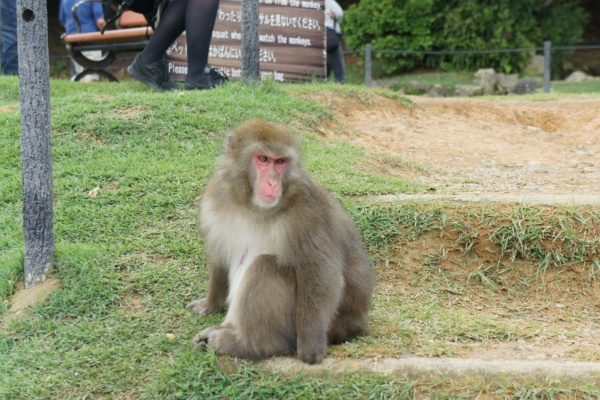

In [15]:
let img = image::open("macaque.jpg")?;
img.to_rgb8()

### imshow
注意：plottersのevcxrを使うとバックエンドがSVGになる。このバックエンドの場合、ビットマップをうまく扱えないので、ピクセルを四角で書き並ている。

ref: https://github.com/38/plotters/blob/master/examples/matshow.rs

In [14]:
evcxr_figure((400, 300), |root| {
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    // x:0-8, y:0-80の範囲で描画させる。
    // BitMapElementを使えばもう少しましになるはずだが、
    // ipynb環境ではsvgしか使えず、BitMapElementもなぜか使えないため、
    // 各ピクセルの長方形を作ってmatrixを表示させるように描画している。
    let (w, h) = (100, 100); // 後段の処理が遅いので縮小しておく
    let img = img
        .resize_exact(w, h, FilterType::Gaussian)
        .to_rgb8();
    
    // chartの座標軸上での画素サイズ
    let dx = 8f32 / w as f32;
    let dy = 80f32 / h as f32;
   
    chart.draw_series(
         (0..img.height() * img.width())
        .map(|i| {
            let y = i / w;
            let x = i % w; 
            let pixel = img.get_pixel(x, (h-1) - y);
            let lu = (dx * x as f32, dy * y as f32);
            let rb = (dx * (x+1) as f32, dy * (y+1) as f32);
            let color = RGBColor(pixel.0[0], pixel.0[1], pixel.0[2]);
            Rectangle::new([lu, rb], color.filled())
            })
        );
      
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
    
    chart.configure_mesh()
        .light_line_style(BLACK.stroke_width(0))  // stroke width 0にminor tickを消す
        .draw()?;        // draw ticks
    

    Ok(())
})

y=x^2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
